In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


# Data Cleaning

In [4]:
def process_string(data, column, pattern, replacement):
        return data[column].str.replace(pattern, replacement, regex=True)

columns = list(df.columns)[2:6]

for col in columns:
    df[col] = process_string(df, col, '\w\d - ', '')
    
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,Female,Black,Non-Hispanic,Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,Female,White,Non-Hispanic,Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,Male,White,Hispanic,Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,Male,Unknown,Hispanic,Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,Female,Black,Non-Hispanic,Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['GENDER_FACTOR'].value_counts()

Male      169032
Female    164168
Name: GENDER_FACTOR, dtype: int64

In [6]:
df['RACE_FACTOR'].value_counts()

White                        183308
Black                         97795
Unknown                       40940
Asian or Pacific Islander      9152
Other                          2005
Name: RACE_FACTOR, dtype: int64

In [7]:
df['ETHNICITY_FACTOR'].value_counts()

Non-Hispanic    317868
Hispanic         15332
Name: ETHNICITY_FACTOR, dtype: int64

In [8]:
df['PAYER_FACTOR'].value_counts()

Non-Medicaid    246340
Medicaid         86860
Name: PAYER_FACTOR, dtype: int64

In [9]:

allergy_columns = list(df.columns)[9:-9]
allergies = list(set([allergy.split('_')[0] for allergy in allergy_columns]))

def process_allergy_deltas(df, allergy_name):
    return df[allergy_name + '_ALG_START'].astype(float) - df[allergy_name + '_ALG_END'].astype(float)

for allergy in allergies:
    df[allergy + "_DELTA"] = process_allergy_deltas(df, allergy)

df['ATOPIC_DERM_DELTA'] = df['ATOPIC_DERM_START'].astype(float) - df['ATOPIC_DERM_END'].astype(float)

df['STUDY_DURATION_YEARS'] = df['AGE_END_YEARS'].astype(float) - df['AGE_START_YEARS'].astype(float)

# Visualize Data

[Text(0.5, 1.0, 'Demographics by Race/Payer Factor')]

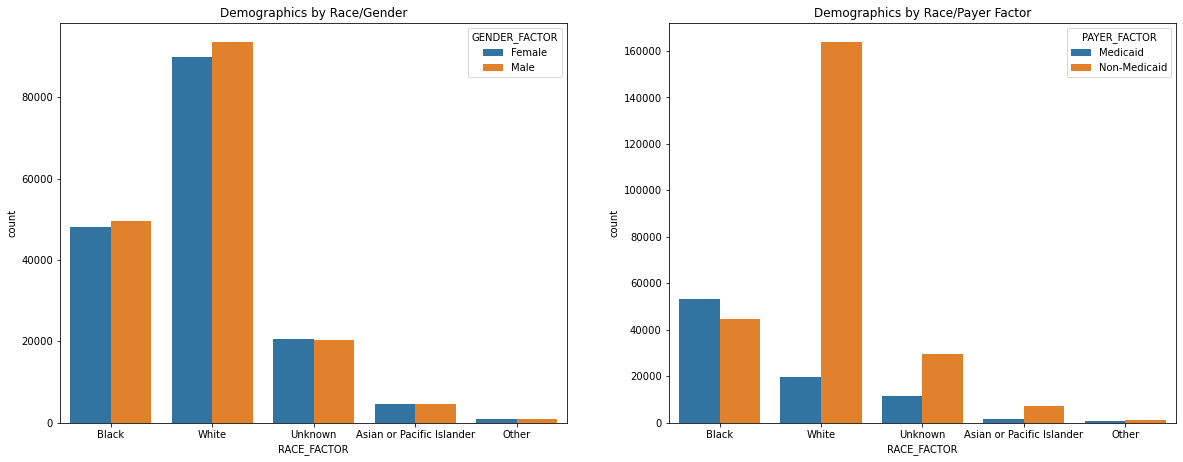

In [10]:
plt.figure(figsize=(20, 25))

plt.subplot(321)
sns.countplot(data=df, x="RACE_FACTOR", hue='GENDER_FACTOR').set(title='Demographics by Race/Gender')
plt.subplot(322)
sns.countplot(data=df, x="RACE_FACTOR", hue='PAYER_FACTOR').set(title='Demographics by Race/Payer Factor')

# Allergy Prevalence Deltas Visualization by Gender

In [11]:
def show_delta_plot(condition_name, hue_factor):
    data_new = df[df[condition_name + '_DELTA'] != 0].loc[:,[hue_factor,'STUDY_DURATION_YEARS', condition_name + '_DELTA']].dropna()
    sns.scatterplot(data = data_new, x = condition_name + '_DELTA', y = 'STUDY_DURATION_YEARS', hue = hue_factor).set(title = condition_name + ' Delta Over Time')

[Text(0.5, 1.0, 'ATOPIC_DERM Delta Over Time')]

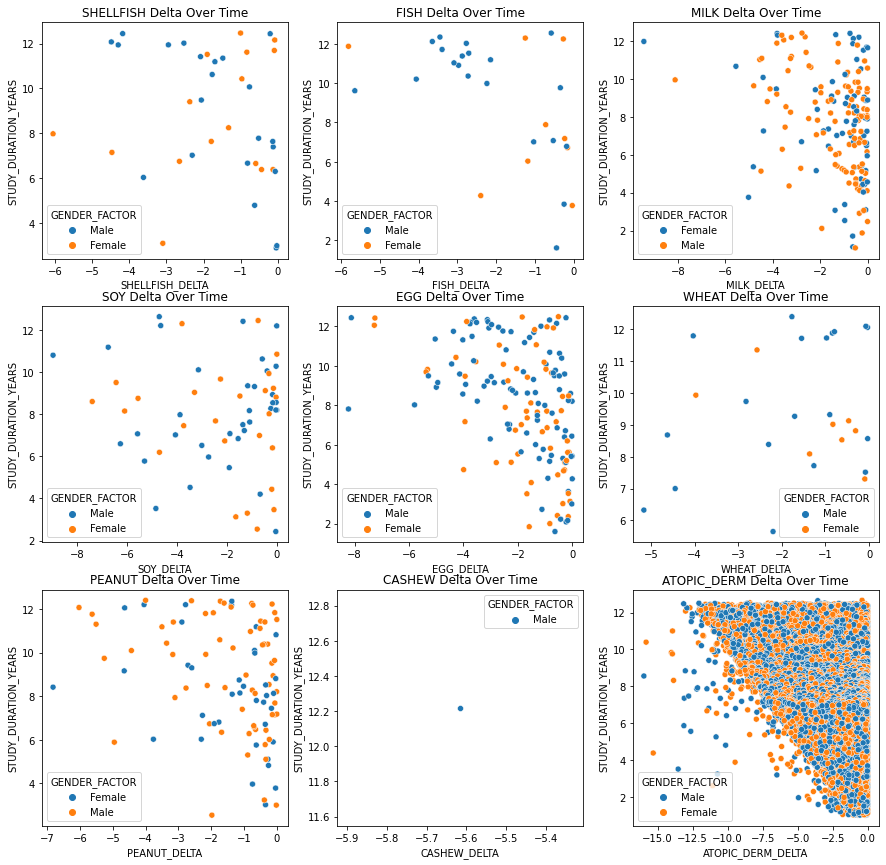

In [12]:
plt.figure(figsize = (15, 20))

plt.subplot(431)
show_delta_plot('SHELLFISH', 'GENDER_FACTOR')

plt.subplot(432)
show_delta_plot('FISH','GENDER_FACTOR')

plt.subplot(433)
show_delta_plot('MILK', 'GENDER_FACTOR')

plt.subplot(434)
show_delta_plot('SOY','GENDER_FACTOR')

plt.subplot(435)
show_delta_plot('EGG','GENDER_FACTOR')

plt.subplot(436)
show_delta_plot('WHEAT','GENDER_FACTOR')

plt.subplot(437)
show_delta_plot('PEANUT','GENDER_FACTOR')

plt.subplot(438)
show_delta_plot('CASHEW','GENDER_FACTOR')

plt.subplot(439)
data_atopic = df[df['ATOPIC_DERM_DELTA'] != 0].loc[:,['GENDER_FACTOR','STUDY_DURATION_YEARS', 'ATOPIC_DERM_DELTA']].dropna()
data_atopic = data_atopic[data_atopic['ATOPIC_DERM_DELTA'] > -40]
sns.scatterplot(data = data_atopic, x = 'ATOPIC_DERM_DELTA', y = 'STUDY_DURATION_YEARS', hue = 'GENDER_FACTOR').set(title = 'ATOPIC_DERM Delta Over Time')

# Allergy Prevalence Deltas Visualization by Race Demographic

[Text(0.5, 1.0, 'ATOPIC_DERM Delta Over Time')]

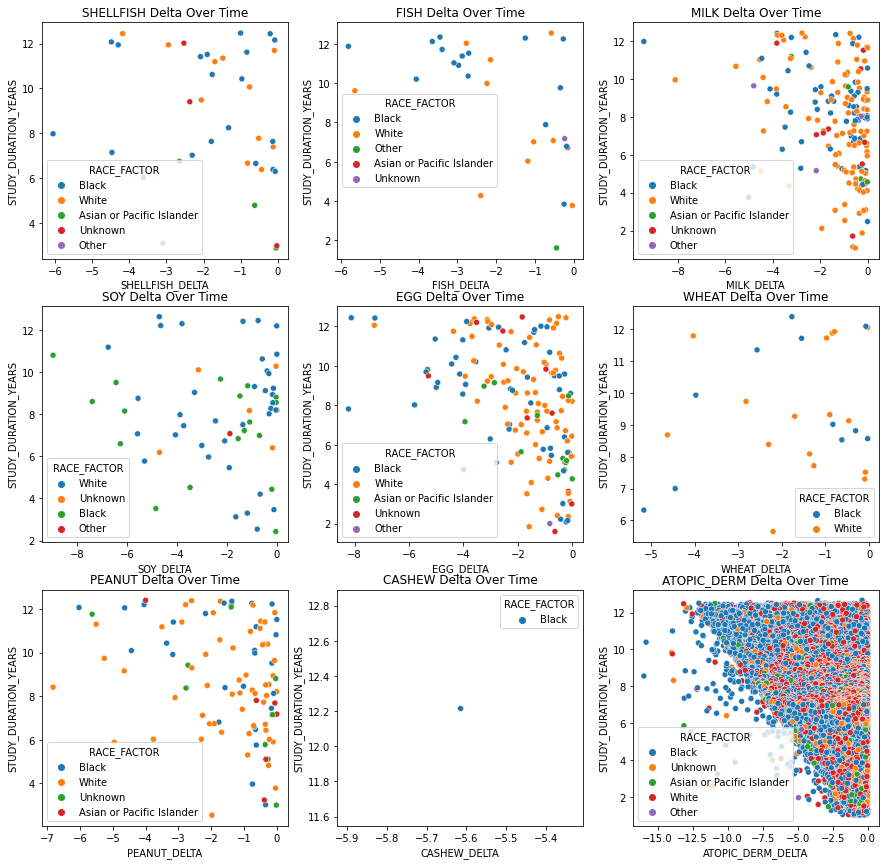

In [13]:
plt.figure(figsize = (15, 20))

plt.subplot(431)
show_delta_plot('SHELLFISH', 'RACE_FACTOR')

plt.subplot(432)
show_delta_plot('FISH','RACE_FACTOR')

plt.subplot(433)
show_delta_plot('MILK', 'RACE_FACTOR')

plt.subplot(434)
show_delta_plot('SOY','RACE_FACTOR')

plt.subplot(435)
show_delta_plot('EGG','RACE_FACTOR')

plt.subplot(436)
show_delta_plot('WHEAT','RACE_FACTOR')

plt.subplot(437)
show_delta_plot('PEANUT','RACE_FACTOR')

plt.subplot(438)
show_delta_plot('CASHEW','RACE_FACTOR')


plt.subplot(439)
data_atopic = df[df['ATOPIC_DERM_DELTA'] != 0].loc[:,['RACE_FACTOR','STUDY_DURATION_YEARS', 'ATOPIC_DERM_DELTA']].dropna()
data_atopic = data_atopic[data_atopic['ATOPIC_DERM_DELTA'] > -40]
sns.scatterplot(data = data_atopic, x = 'ATOPIC_DERM_DELTA', y = 'STUDY_DURATION_YEARS', hue = 'RACE_FACTOR').set(title = 'ATOPIC_DERM Delta Over Time')